In [ ]:
%pip install cufflinks
%pip install nbformat


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
from IPython.display import display,HTML 

In [ ]:
data = pd.read_csv("CountryTable.csv")
data

In [5]:
#Realizamos una copia del dataframe
data=data.copy()

In [7]:
valores_nulos=data.isnull().sum()
valores_nulos

code                  0
name                  0
continent             0
region                0
surface_area          0
independence_year    47
population            0
life_expectancy      17
gnp                   0
gnp_old              61
local_name            1
government_form       0
head_of_state         3
capital               7
code2                 1
dtype: int64

In [ ]:
data["independence_year"] =data["independence_year"].fillna("1900") 
data

In [ ]:
data["life_expectancy"]=data["life_expectancy"].fillna(round(data["life_expectancy"].mean(),1))
data

In [ ]:
data["gnp_old"]=data["gnp_old"].fillna(round(data["gnp_old"].mean(),1))
data

In [ ]:
data["local_name"] =data["local_name"].fillna("Inexistente") 
data

In [ ]:
data["head_of_state"] =data["head_of_state"].fillna("Desconocido") 
data

In [ ]:
data["capital"] =data["capital"].fillna("0") 
data

In [ ]:
data["code2"] =data["code2"].fillna("NA") 
data

In [17]:
valores_nulos=data.isnull().sum()
valores_nulos

code                 0
name                 0
continent            0
region               0
surface_area         0
independence_year    0
population           0
life_expectancy      0
gnp                  0
gnp_old              0
local_name           0
government_form      0
head_of_state        0
capital              0
code2                0
dtype: int64

In [ ]:
#Aplicar método de distribución normal para identificar Outliers, tomando como limites 2 desviaciones estándar,
#exclusivamente para las columnas “gnp old” y “population”, obtener los diagramas de caja de cada una respectivamente.


In [22]:
y=data["gnp_old"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido 2029485.9971340206
Limite inferior permitido -1698417.3753766986


In [ ]:
#Encontramos Ouliers
outliers= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

In [ ]:
#Obtenemos datos limpios
data_clean= data[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data_clean

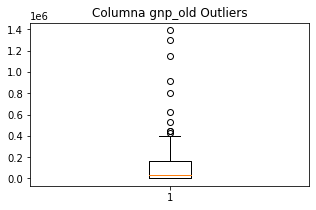

In [26]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean["gnp_old"]) 
plt.title("Columna gnp_old Outliers")
plt.show() #dibujamos el diagrama

In [27]:
y=data["population"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido 353453549.7887699
Limite inferior permitido -302585353.5544602


In [28]:
outliers= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
41,CHN,China,Asia,Eastern Asia,9572900.0,-1523.0,1277558000,71.4,982268.0,917719.0,Zhongquo,People'sRepublic,Jiang Zemin,1891.0,CN
99,IND,India,Asia,Southern and Central Asia,3287263.0,1947.0,1013662000,62.5,447114.0,430572.0,Bharat/India,Federal Republic,Kocheril Raman Narayanan,1109.0,IN


In [29]:
data_clean= data[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data_clean

,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
0,ABW,Aruba,North America,Caribbean,193.0,1900,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Willem-Alexander,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,165534.3,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,Jose Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,1900,8000,76.1,63.2,165534.3,Anguilla,Dependent Territory of the uK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqiperia,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6041.0,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YuG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,17000.0,165534.3,Jugoslavija,Federal Republic,Vojislav KoStunica,1792.0,Yu
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,116729.0,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3377.0,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM


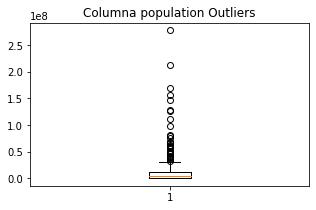

In [30]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean["population"]) 
plt.title("Columna population Outliers")
plt.show() #dibujamos el diagrama